## Observations and Insights 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = combined_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = combined_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = combined_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = combined_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = combined_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.

statistics_dict={
    'Mean' : mean,
    'Median' : median,
    'Variance' : variance,
    'Standard_Deviation' : std,
    'Standard_Error_of_Mean' : sem
}
summary_statistics=pd.DataFrame(statistics_dict)
#summary of table
summary_statistics

,Mean,Median,Variance,Standard_Deviation,Standard_Error_of_Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics_dict={
    'Mean' : mean,
    'Median' : median,
    'Variance' : variance,
    'Standard_Deviation' : std,
    'Standard_Error_of_Mean' : sem
}
summary_statistics=pd.DataFrame(statistics_dict)
#summary of table
summary_statistics
# This method produces everything in a single groupby function
summary_statistics=combined_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

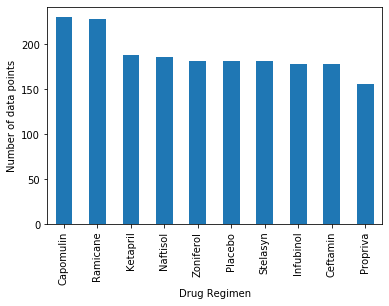

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
counts=combined_data['Drug Regimen'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of data points')
plt.show()


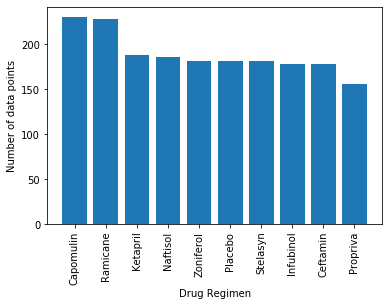

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

counts=combined_data['Drug Regimen'].value_counts()
plt.bar(counts.index, counts)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of data points')
plt.show()

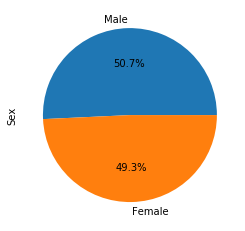

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts=combined_data['Sex'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.show()


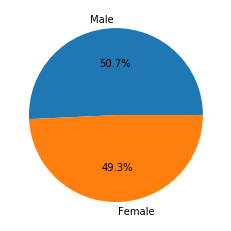

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts=combined_data['Sex'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#regimen=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
max_time=combined_data.loc[:, ['Mouse ID', 'Timepoint']].groupby('Mouse ID').max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_study=pd.merge(max_time, combined_data, on=['Mouse ID', 'Timepoint'], how='left')

In [42]:
# Put treatments into a list for for loop (and later for plot labels)
regimen=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_drug in regimen:
    filter_df=max_time_study.loc[:, 'Drug Regimen']==each_drug
    four_quantiles=[.25, .5, .75]
    one_drug_tumor_vol=max_time_study.loc[filter_df, 'Tumor Volume (mm3)']
    tumor_vol_list.append(one_drug_tumor_vol)
    quartiles=one_drug_tumor_vol.quantile(four_quantiles)
    lowerq=quartiles.loc[.25]
    upperq=quartiles.loc[.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
    filter_df=(one_drug_tumor_vol>upper_bound) | (one_drug_tumor_vol<lower_bound)
    outlier_count=len(one_drug_tumor_vol.loc[filter_df])
    print(f"There are{outlier_count} outliers for {each_drug}")
    

There are0 outliers for Capomulin
There are0 outliers for Ramicane
There are1 outliers for Infubinol
There are0 outliers for Ceftamin


In [43]:
tumor_vol_list

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

<function matplotlib.pyplot.show(*args, **kw)>

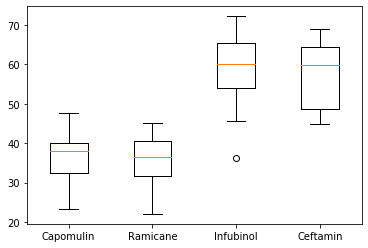

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list, labels=regimen)
plt.show

## Line and Scatter Plots

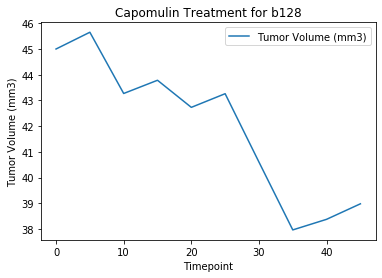

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
filter_df=combined_data.loc[:, 'Drug Regimen']=='Capomulin'
capomulin=combined_data.loc[filter_df, :]
filter_df=capomulin.loc[:, 'Mouse ID']== 'b128'
one_mouse=capomulin.loc[filter_df, :]
one_mouse.plot('Timepoint', 'Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for b128')
plt.show()

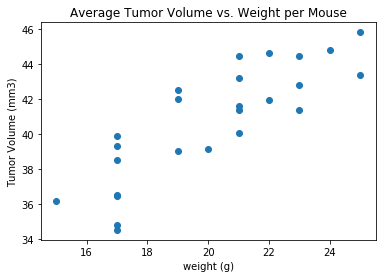

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_avg=capomulin[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)',]].groupby('Mouse ID').mean()

plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight per Mouse')
plt.show()

## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(sts.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0], 2)
print(f"Correlation is {corr}")

Correlation is 0.84


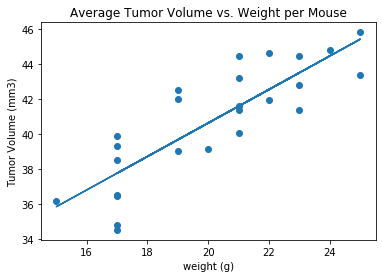

In [53]:
#y=mx+b
m, b, r, p, std=sts.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
y_pred=m*capomulin_avg['Weight (g)']+b
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], y_pred)
plt.xlabel('weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight per Mouse')
plt.show()